In [1]:
import csv

import pandas as pd

import numpy as np

import torch

from torch import nn, optim

from torch.autograd import Variable

from torch.utils.data import Dataset

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

import time

In [2]:
# 定义自己的类
class MyDataset(Dataset):
    
    # 初始化
    def __init__(self, file_name):
        # 读入数据
        self.data = pd.read_csv(file_name)
    
    # 返回df的长度
    def __len__(self):
        return len(self.data)
    
    # 获取第idx+1列的数据
    def __getitem__(self, idx):
        return self.data.values[idx,1:10]

# 通过实例化对象来访问该类
# 假设同目录下存在名为median_benchmark.csv的文件
ds = MyDataset('formatweather.csv')
ds=np.asarray(ds[:], dtype = np.float32)#####源文件float32 ,不知道为什么读取变为float64，这里再进行处理  最大最小化时变化
##dl = DataLoader(ds, batch_size=100, shuffle=False)

#####处理为torch，分为trainx，trainy
torchds=torch.from_numpy(ds[:])


In [3]:
train_dataset =torchds[:30700]  ##0.7*43823
test_dataset =torchds[30700:]
dl = DataLoader(train_dataset, batch_size=100, shuffle=True)

In [4]:
class Cnn(nn.Module):

    def __init__(self, in_dim, n_class):

        super(Cnn, self).__init__()

        self.conv = nn.Sequential(

            nn.Conv2d(in_dim, 6, (1,2), stride=(1), padding=(0,1)),#6,1,9

            nn.ReLU(True),

            nn.MaxPool2d(1, 1),#6,1,9

            nn.Conv2d(6, 16, (1,3), stride=(1), padding=(0,1)),

            nn.ReLU(True), nn.MaxPool2d(1, 1))#16,1,9
   
            #5*144

        self.fc = nn.Linear(144, 16)
        
        self.fc1 = nn.Linear(16, 3)
        
        self.fc2 = nn.Linear(3, n_class)


    def forward(self, x):

        out = self.conv(x)

        out = out.view(out.size(0), -1)

        out = self.fc(out)
        
        out1=self.fc1(out)
        
        out=self.fc2(out1)
        
        #out = out.view(5)

        return out

In [5]:
model = Cnn(1, 1)
##model.load_state_dict(torch.load('./weathercnn.pth'))
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
losslist=[]
start = time.clock()
for epoch in range(200):
 
    print('epoch {}'.format(epoch + 1))

    print('*' * 10)

    running_loss = 0.0

    for i, data in enumerate(dl, 1):
        
            train_x=data[:,0:8]
            
            train_x=train_x.view(-1,1,1,8)
            
            train_y=data[:,8]
            
            train_y=train_y.view(-1,1)
            
            train_x=Variable(train_x)
            
            train_y=Variable(train_y)
        
            out = model(train_x)

            loss = criterion(out, train_y)
            
            running_loss += loss.item() * train_y.size(0)

            # 向后传播

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
            
    losslist.append(running_loss / (len(train_dataset)))   
           
                
    print('running_loss:-------')
    print(running_loss / (len(train_dataset)))  ##0.0006970368708326127          
    #print(out,train_y)
print(time.clock()-start)  ##283.5160363  2-625.7817151 572.3782882

I:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


epoch 1
**********
running_loss:-------
0.012693815022791927
epoch 2
**********
running_loss:-------
0.008187244846470387
epoch 3
**********
running_loss:-------
0.008143638726323843
epoch 4
**********
running_loss:-------
0.008098646898295864
epoch 5
**********
running_loss:-------
0.008054486524422899
epoch 6
**********
running_loss:-------
0.008009787524537659
epoch 7
**********
running_loss:-------
0.007964342338084593
epoch 8
**********
running_loss:-------
0.007917555547334521
epoch 9
**********
running_loss:-------
0.007871294846145455
epoch 10
**********
running_loss:-------
0.007821191939546541
epoch 11
**********
running_loss:-------
0.007774011818206708
epoch 12
**********
running_loss:-------
0.007719328271297902
epoch 13
**********
running_loss:-------
0.007667986691265036
epoch 14
**********
running_loss:-------
0.007612133974282235
epoch 15
**********
running_loss:-------
0.007553816020658622
epoch 16
**********
running_loss:-------
0.007491380118852912
epoch 17
********

running_loss:-------
0.0006981953467657268
epoch 132
**********
running_loss:-------
0.0006979756756038753
epoch 133
**********
running_loss:-------
0.0006979465032324759
epoch 134
**********
running_loss:-------
0.00069757289954132
epoch 135
**********
running_loss:-------
0.0006975718547896473
epoch 136
**********
running_loss:-------
0.0006973424990675093
epoch 137
**********
running_loss:-------
0.0006972954472745329
epoch 138
**********
running_loss:-------
0.0006973610092458809
epoch 139
**********
running_loss:-------
0.000696954595251919
epoch 140
**********
running_loss:-------
0.0006970175874593186
epoch 141
**********
running_loss:-------
0.000696469504218958
epoch 142
**********
running_loss:-------
0.0006967336083030486
epoch 143
**********
running_loss:-------
0.0006965065523049208
epoch 144
**********
running_loss:-------
0.0006964657693537838
epoch 145
**********
running_loss:-------
0.0006963731655631069
epoch 146
**********
running_loss:-------
0.000696188642206171
ep

I:\Anaconda\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


572.3782882


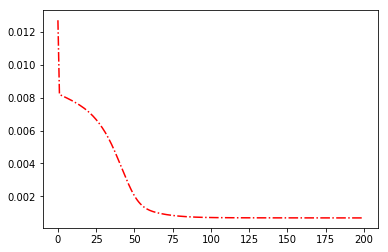

In [7]:
plt.plot(losslist,'r-.') 
plt.show()

In [8]:
out.detach().numpy().shape

(100, 1)

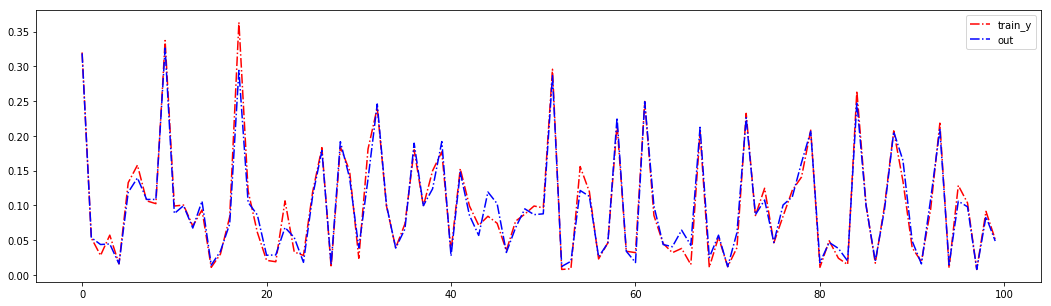

In [9]:
x=range(0,100)
plt.figure(num=1,figsize=(18,5))#定义编号为1 大小为(8,5)
plt.plot(x,train_y.numpy(),'r-.',label='train_y') 
plt.plot(x,out.detach().numpy(),'b-.',label='out') 
plt.legend(loc='best')#显示在最好的位置
plt.show()

In [10]:
model.eval()
    
test_x=test_dataset[:,0:8]

test_x=test_x.view(-1,1,1,8)

test_y=test_dataset[:,8]

test_y=test_y.view(-1,1)

test_x=Variable(test_x)

test_y=Variable(test_y)

out = model(test_x)

#loss = criterion(out, test_y)


In [11]:
####计算准确率
acc=0
for i in range(13123):
    x=test_y.numpy()[i]-out.detach().numpy()[i]
    if abs(x)<=0.02:
        acc+=1
accuracy_rate=acc/13123
print(accuracy_rate)  ##0.7911300769641089 0.8299931418120856 0.8328126190657624

0.8328126190657624


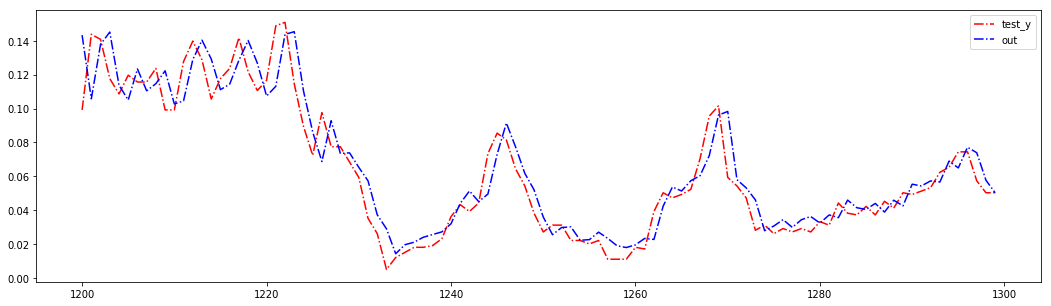

In [12]:
#x=range(0,13123)
x=range(1200,1300)
plt.figure(num=1,figsize=(18,5))#定义编号为1 大小为(8,5)
plt.plot(x,test_y.numpy()[1200:1300],'r-.',label='test_y') 
plt.plot(x,out.detach().numpy()[1200:1300],'b-.',label='out') 
plt.legend(loc='best')#显示在最好的位置
plt.show()

In [13]:
# 保存模型
torch.save(model.state_dict(), './weathercnn-0.01-true-7.17.pth')